In [7]:
import pandas as pd

filename = 'need_public_use_file_2014.csv'
df = pd.read_csv(filename)

In [8]:
df.head(20)

,HH_ID,REGION,IMD_ENG,IMD_WALES,Gcons2005,Gcons2005Valid,Gcons2006,Gcons2006Valid,Gcons2007,Gcons2007Valid,...,FLOOR_AREA_BAND,EE_BAND,LOFT_DEPTH,WALL_CONS,CWI,CWI_YEAR,LI,LI_YEAR,BOILER,BOILER_YEAR
0,1,E12000007,1.0,NaN,35000.0,V,24500.0,V,22000.0,V,...,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN
1,2,E12000002,4.0,NaN,19000.0,V,14900.0,V,16000.0,V,...,2,4,2,2,NaN,NaN,NaN,NaN,NaN,NaN
2,3,E12000002,4.0,NaN,22500.0,V,22500.0,V,22500.0,V,...,4,3,2,1,NaN,NaN,NaN,NaN,1.0,2004.0
3,4,E12000005,1.0,NaN,21000.0,V,20500.0,V,18000.0,V,...,3,4,2,2,NaN,NaN,NaN,NaN,NaN,NaN
4,5,E12000003,1.0,NaN,NaN,M,NaN,M,NaN,M,...,1,2,99,2,NaN,NaN,NaN,NaN,NaN,NaN
5,6,E12000007,2.0,NaN,NaN,O,NaN,O,NaN,O,...,1,1,99,1,NaN,NaN,NaN,NaN,NaN,NaN
6,7,E12000006,3.0,NaN,12000.0,V,16500.0,V,12300.0,V,...,2,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN
7,8,E12000005,5.0,NaN,18500.0,V,15500.0,V,13900.0,V,...,4,3,2,1,NaN,NaN,NaN,NaN,NaN,NaN
8,9,E12000007,4.0,NaN,35000.0,V,40000.0,V,35000.0,V,...,3,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN
9,10,E12000003,2.0,NaN,28000.0,V,26000.0,V,24000.0,V,...,3,3,2,1,NaN,NaN,1.0,2009.0,NaN,NaN


In [9]:
# keep only london region entries

london = 'E12000007'
df = df[df.REGION==london]

# drop the region column, and index for wales
df = df.drop(columns=['REGION', 'IMD_WALES'])
df.head()

,HH_ID,IMD_ENG,Gcons2005,Gcons2005Valid,Gcons2006,Gcons2006Valid,Gcons2007,Gcons2007Valid,Gcons2008,Gcons2008Valid,...,FLOOR_AREA_BAND,EE_BAND,LOFT_DEPTH,WALL_CONS,CWI,CWI_YEAR,LI,LI_YEAR,BOILER,BOILER_YEAR
0,1,1.0,35000.0,V,24500.0,V,22000.0,V,25000.0,V,...,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2.0,NaN,O,NaN,O,NaN,O,NaN,O,...,1,1,99,1,NaN,NaN,NaN,NaN,NaN,NaN
8,9,4.0,35000.0,V,40000.0,V,35000.0,V,35000.0,V,...,3,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN
10,11,2.0,1000.0,V,35000.0,V,35000.0,V,22500.0,V,...,2,3,1,2,NaN,NaN,NaN,NaN,NaN,NaN
11,12,1.0,NaN,M,NaN,M,NaN,M,NaN,M,...,1,3,99,1,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# select all the headings containing 'gcons', 'econs', and 'valid' using list comprehension
colheads = df.columns
gcons = [c for c in colheads if ('Gcons' in c) & ('Valid' not in c)]
econs = [c for c in colheads if ('Econs' in c) & ('Valid' not in c)]

In [11]:
# use the remaining headings as identifiers (dropping the validation columns and instead manually drop NaN entries and consumption that are out of range)
colheads_keep1 = [x for x in colheads if ('Gcons' not in x) & ('Valid' not in x)]

df1 = pd.melt(df, id_vars=colheads_keep1, value_vars=gcons, var_name='col_name', value_name='gcons')
df1 = df1[(df1.gcons.notnull()) | ((df1.gcons > 100) & (df1.gcons<50000))]

# keep only year part of col_name and save as new column
df1['year'] = df1.col_name.astype(str).str[5:9]
df1 = df1.drop(columns='col_name')

df1.head()

,HH_ID,IMD_ENG,Econs2005,Econs2006,Econs2007,Econs2008,Econs2009,Econs2010,Econs2011,Econs2012,...,LOFT_DEPTH,WALL_CONS,CWI,CWI_YEAR,LI,LI_YEAR,BOILER,BOILER_YEAR,gcons,year
0,1,1.0,12500.0,10900.0,12500.0,11000.0,9500.0,10000.0,7600,6300.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,35000.0,2005
2,9,4.0,10300.0,7700.0,14500.0,6000.0,5650.0,3050.0,3850,4400.0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,35000.0,2005
3,11,2.0,4300.0,5400.0,3600.0,3500.0,3600.0,3250.0,3900,5150.0,...,1,2,NaN,NaN,NaN,NaN,NaN,NaN,1000.0,2005
5,36,4.0,5800.0,6250.0,4900.0,6350.0,6250.0,6750.0,6300,7950.0,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,35000.0,2005
7,57,5.0,2450.0,2650.0,2800.0,3600.0,3300.0,3200.0,3250,1550.0,...,2,2,1.0,2012.0,NaN,NaN,NaN,NaN,15900.0,2005


In [12]:
# save melted electricity consumption as new dataframe then merge with df1
df_econs = pd.melt(df1, id_vars='HH_ID', value_vars=econs, var_name='col_name', value_name='econs')
df_econs = df_econs[(df_econs.econs.notnull()) | ((df_econs.econs>100) & (df_econs.econs<50000))]
df_econs['year'] = df_econs.col_name.astype(str).str[5:9]
df_econs = df_econs.drop(columns='col_name')
df_econs.head()

,HH_ID,econs,year
0,1,12500.0,2005
1,9,10300.0,2005
2,11,4300.0,2005
3,36,5800.0,2005
4,57,2450.0,2005


In [13]:
# drop econs columns in gas consumption dataframe then merge on HHID and year
df1 = df1.drop(columns=econs)

ldn = df1.merge(df_econs, how='inner', left_on=['HH_ID', 'year'], right_on=['HH_ID', 'year'])
ldn.drop_duplicates(inplace=True)
ldn = ldn.sort_values(by='HH_ID')
ldn = ldn.reset_index(drop=True)
ldn.head()

,HH_ID,IMD_ENG,E7Flag2012,MAIN_HEAT_FUEL,PROP_AGE,PROP_TYPE,FLOOR_AREA_BAND,EE_BAND,LOFT_DEPTH,WALL_CONS,CWI,CWI_YEAR,LI,LI_YEAR,BOILER,BOILER_YEAR,gcons,year,econs
0,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,35000.0,2005,12500.0
1,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,22000.0,2007,12500.0
2,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,2008,11000.0
3,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,23000.0,2009,9500.0
4,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,2010,10000.0


In [14]:
ldn.dtypes

HH_ID                int64
IMD_ENG            float64
E7Flag2012         float64
MAIN_HEAT_FUEL       int64
PROP_AGE             int64
PROP_TYPE            int64
FLOOR_AREA_BAND      int64
EE_BAND              int64
LOFT_DEPTH           int64
WALL_CONS            int64
CWI                float64
CWI_YEAR           float64
LI                 float64
LI_YEAR            float64
BOILER             float64
BOILER_YEAR        float64
gcons              float64
year                object
econs              float64
dtype: object

In [15]:
# convert year column from object to int
ldn['year'] = pd.to_numeric(ldn.year)
ldn.dtypes

HH_ID                int64
IMD_ENG            float64
E7Flag2012         float64
MAIN_HEAT_FUEL       int64
PROP_AGE             int64
PROP_TYPE            int64
FLOOR_AREA_BAND      int64
EE_BAND              int64
LOFT_DEPTH           int64
WALL_CONS            int64
CWI                float64
CWI_YEAR           float64
LI                 float64
LI_YEAR            float64
BOILER             float64
BOILER_YEAR        float64
gcons              float64
year                 int64
econs              float64
dtype: object

In [16]:
# groupby properties by HH_ID and see average
ldn_HH = ldn.groupby('HH_ID').mean()
ldn.head()

,HH_ID,IMD_ENG,E7Flag2012,MAIN_HEAT_FUEL,PROP_AGE,PROP_TYPE,FLOOR_AREA_BAND,EE_BAND,LOFT_DEPTH,WALL_CONS,CWI,CWI_YEAR,LI,LI_YEAR,BOILER,BOILER_YEAR,gcons,year,econs
0,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,35000.0,2005,12500.0
1,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,22000.0,2007,12500.0
2,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,2008,11000.0
3,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,23000.0,2009,9500.0
4,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,2010,10000.0


In [17]:
# correlation between building age and gas consumption? - 101=before 1930 etc...

from matplotlib import pyplot as plt
import seaborn as sns

sns.lmplot(x='PROP_AGE', y='gcons', data=ldn)
plt.show()

<Figure size 500x500 with 1 Axes>

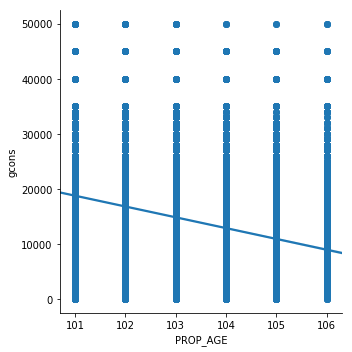

In [24]:
# less correlation with electricity
sns.lmplot(x='PROP_AGE', y='gcons', data=ldn)
plt.show()

In [19]:
ldn['combinedcons']=ldn.gcons+ldn.econs
ldn.head()

,HH_ID,IMD_ENG,E7Flag2012,MAIN_HEAT_FUEL,PROP_AGE,PROP_TYPE,FLOOR_AREA_BAND,EE_BAND,LOFT_DEPTH,WALL_CONS,CWI,CWI_YEAR,LI,LI_YEAR,BOILER,BOILER_YEAR,gcons,year,econs,combinedcons
0,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,35000.0,2005,12500.0,47500.0
1,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,22000.0,2007,12500.0,34500.0
2,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,25000.0,2008,11000.0,36000.0
3,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,23000.0,2009,9500.0,32500.0
4,1,1.0,NaN,1,101,104,4,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,20000.0,2010,10000.0,30000.0


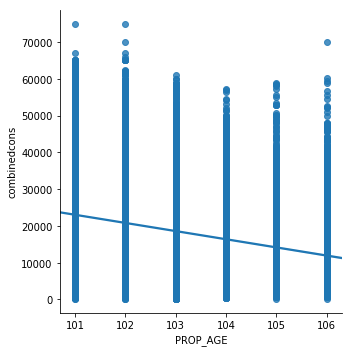

In [20]:
# combined consumption?
sns.lmplot(x='PROP_AGE', y='combinedcons', data=ldn)
plt.show()

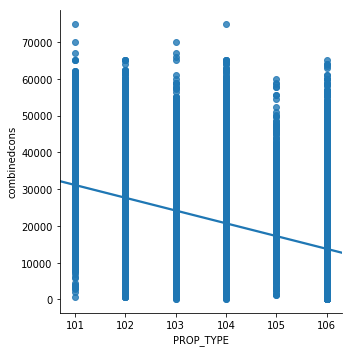

In [25]:
# other parameters
# FLOOR_AREA_BAND, 

v = ['PROP_TYPE', 'FLOOR_AREA_BAND', 'EE_BAND', 'LOFT_DEPTH', 'BOILER_YEAR', 'IMD_ENG']
n = 0
sns.lmplot(x=v[n], y='combinedcons', data=ldn)
plt.show()